# rocketman lab

https://www.analyticsvidhya.com/blog/2019/04/build-first-multi-label-image-classification-model-python/

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm

%matplotlib inline

Using TensorFlow backend.


## preprocessing

In [2]:
df = pd.read_csv("C:\\Data\\Dev-Data\\music\\labels\\labels.csv")    
df.head()     

,label,path,filename
0,10,C:\Data\Dev-Data\music\labels\10,c0_04_1_14.PNG
1,10,C:\Data\Dev-Data\music\labels\10,c10_18_0_13.PNG
2,10,C:\Data\Dev-Data\music\labels\10,c10_18_0_20.PNG
3,10,C:\Data\Dev-Data\music\labels\10,c21_05_1_18.PNG
4,10,C:\Data\Dev-Data\music\labels\10,c21_05_1_6.PNG


In [3]:
# one hot encoding
# http://www.insightsbot.com/blog/zuyVu/python-one-hot-encoding-with-pandas-made-simple 

df ['label'] = pd.Categorical (df['label'])
dfOneHot = pd.get_dummies (df['label'], prefix = 'category')
df = pd.concat ([df, dfOneHot], axis=1)

df[250:260]

,label,path,filename,category_10,category_11,category_12,category_13,category_14,category_15,category_16,category_8,category_9,category_other
250,12,C:\Data\Dev-Data\music\labels\12,c88_06_0_14.PNG,0,0,1,0,0,0,0,0,0,0
251,12,C:\Data\Dev-Data\music\labels\12,c88_06_0_20.PNG,0,0,1,0,0,0,0,0,0,0
252,12,C:\Data\Dev-Data\music\labels\12,c88_06_1_13.PNG,0,0,1,0,0,0,0,0,0,0
253,12,C:\Data\Dev-Data\music\labels\12,c88_06_1_3.PNG,0,0,1,0,0,0,0,0,0,0
254,12,C:\Data\Dev-Data\music\labels\12,c88_06_1_6.PNG,0,0,1,0,0,0,0,0,0,0
255,12,C:\Data\Dev-Data\music\labels\12,c88_08_1_2.PNG,0,0,1,0,0,0,0,0,0,0
256,12,C:\Data\Dev-Data\music\labels\12,c88_08_1_7.PNG,0,0,1,0,0,0,0,0,0,0
257,12,C:\Data\Dev-Data\music\labels\12,c88_09_1_11.PNG,0,0,1,0,0,0,0,0,0,0
258,12,C:\Data\Dev-Data\music\labels\12,c88_10_0_25.PNG,0,0,1,0,0,0,0,0,0,0
259,12,C:\Data\Dev-Data\music\labels\12,c88_10_1_20.PNG,0,0,1,0,0,0,0,0,0,0


In [4]:
train = df
train.columns

Index(['label', 'path', 'filename', 'category_10', 'category_11',
       'category_12', 'category_13', 'category_14', 'category_15',
       'category_16', 'category_8', 'category_9', 'category_other'],
      dtype='object')

In [5]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img(train['path'][i]+'\\'+train['filename'][i],target_size=(255,50,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)
X.shape

100%|██████████| 861/861 [00:01<00:00, 626.35it/s]


(861, 255, 50, 3)

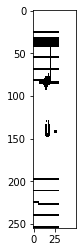

In [6]:
plt.imshow (X[10])

In [7]:
y = np.array(train.drop(['label', 'path', 'filename'],axis=1))
y.shape

(861, 10)

## train model

In [8]:
# split training und validation data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [9]:
# build model architecture

# The problems is that the output of layer conv2d_4 became zero or negative. 
# To solve this problem, you must design the network so that the input data would not be highly downsampled.
# Here are some possible solutions:
#    Use less layers. Especially remove a max-pooling layer, which downsamples a lot (by one third under this setting).
#    Use smaller max-pooling, e.g. pool_size=(2, 2), which results in downsampling by a half.
#    Use "same padding" for Conv2D layer, which results in no downsampling during the convolution step.

model = Sequential()
#model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(400,400,3)))
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(255,50,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
#model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
#model.add(Dense(25, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
model.summary ()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 251, 46, 16)       1216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 125, 23, 16)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 125, 23, 16)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 125, 23, 16)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 121, 19, 64)       25664     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 60, 9, 64)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 9, 64)         0         
__________

In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [12]:
model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=64)

Train on 774 samples, validate on 87 samples
Epoch 1/50
774/774 [==============================] - ETA: 14s - loss: 0.8075 - acc: 0.47 - ETA: 10s - loss: 0.7269 - acc: 0.55 - ETA: 8s - loss: 0.6772 - acc: 0.6021 - ETA: 6s - loss: 0.6447 - acc: 0.634 - ETA: 5s - loss: 0.6247 - acc: 0.652 - ETA: 4s - loss: 0.6085 - acc: 0.668 - ETA: 3s - loss: 0.5970 - acc: 0.678 - ETA: 2s - loss: 0.5863 - acc: 0.685 - ETA: 2s - loss: 0.5772 - acc: 0.695 - ETA: 1s - loss: 0.5662 - acc: 0.704 - ETA: 0s - loss: 0.5603 - acc: 0.712 - ETA: 0s - loss: 0.5525 - acc: 0.719 - 9s 11ms/step - loss: 0.5525 - acc: 0.7200 - val_loss: 0.5334 - val_acc: 0.9000
Epoch 2/50
774/774 [==============================] - ETA: 6s - loss: 0.4468 - acc: 0.806 - ETA: 6s - loss: 0.4518 - acc: 0.800 - ETA: 5s - loss: 0.4389 - acc: 0.805 - ETA: 5s - loss: 0.4347 - acc: 0.809 - ETA: 4s - loss: 0.4334 - acc: 0.813 - ETA: 4s - loss: 0.4347 - acc: 0.811 - ETA: 3s - loss: 0.4295 - acc: 0.814 - ETA: 2s - loss: 0.4264 - acc: 0.817 - ETA: 2s

## save model and weights

In [13]:
# serialize model to JSON
model_json = model.to_json()
with open("C:\\Data\\Dev-Data\\music\\model\\model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("C:\\Data\\Dev-Data\\music\\model\\model.h5")

# serialize model columns / labels
train.to_csv("C:\\Data\\Dev-Data\\music\\model\\model-columns.csv", index=None, header=True)

print("Saved model to disk")

Saved model to disk
